# Import Modules

In [1]:
!pip install pdfplumber
!pip install os-sys
!pip install os
!pip install sentence_transformers
!pip install faiss-cpu
!pip install numpy
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      Traceback (most recent call last):
        File "/home/donny/Documents/STLA/teammates/teammates_env/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 363, in <module>
          main()
        File "/home/donny/Documents/STLA/teammates/teammates_env/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 345, in main
          json_out['return_val'] = hook(**hook_input['kwargs'

### Install Ollama and Langchain

In [2]:
!curl -fsSL https://ollama.com/install.sh | sh
!pip install langchain_community

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninst

### Start Ollama server as a background process and pull llama3 image.

In [3]:
import subprocess
process = subprocess.Popen(["ollama", "serve"])

In [2]:
!ollama list

NAME                   	ID          	SIZE  	MODIFIED     
nomic-embed-text:latest	0a109f422b47	274 MB	34 hours ago	
qwen2.5:latest         	845dbda0ea48	4.7 GB	34 hours ago	
gemma2:latest          	ff02c3702f32	5.4 GB	34 hours ago	
llama3.1:latest        	42182419e950	4.7 GB	41 hours ago	
phi3:latest            	4f2222927938	2.2 GB	41 hours ago	
mistral:latest         	f974a74358d6	4.1 GB	42 hours ago	
llama3:latest          	365c0bd3c000	4.7 GB	44 hours ago	
llava:latest           	8dd30f6b0cb1	4.7 GB	4 months ago	
gemma:2b               	b50d6c999e59	1.7 GB	4 months ago	
mistral:instruct       	61e88e884507	4.1 GB	6 months ago	
stablelm-zephyr:latest 	0a108dbd846e	1.6 GB	6 months ago	
llama2:latest          	78e26419b446	3.8 GB	6 months ago	


In [5]:
!ollama pull llama3

pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠦ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠋ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠋ pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠙ pulling manifest ⠹ pulling mani

### Expose the port

In [6]:
from google.colab.output import eval_js
notebook_url = eval_js("google.colab.kernel.proxyPort(11434)")

In [7]:
!export OLLAMA_HOST=notebook_url

In [3]:
from langchain_community.llms import Ollama
llm = Ollama(model="llama3")

/tmp/ipykernel_143674/706940382.py:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3")


# Retrieval Augmented Generation RAG
* Step 1: Text Extraction from PDF
* Step 2: Text Chunking by splitting the extracted text into smaller, manageable chunks for effective retrieval.
* Step 3: Embedding Generation by converting text chunks into embedding
* Step 4: Create a system to search for the most relevant chunks based on query similarity. (Faiss Index)
* Step 5: Search for relevant chunks in Faiss Index



In [4]:
import os
import pdfplumber  # Alternative to fitz for PDF handling
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Create the 'static' directory if it doesn't exist
if not os.path.exists("static"):
    os.makedirs("static")


# Step 1: Extract text from the PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Step 2: Chunk the text for efficient retrieval
def chunk_text(text, chunk_size=1000, overlap=200):
    chunks = []
    for i in range(0, len(text), chunk_size - overlap):
        chunks.append(text[i:i + chunk_size])
    return chunks

# Step 3: Create embeddings for each chunk using SentenceTransformer
def create_embeddings(chunks):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(chunks, convert_to_tensor=False)
    return np.array(embeddings)

# Step 4: Build FAISS index
def build_faiss_index(embeddings):
    dimension = embeddings.shape[1]  # Dimensionality of the embeddings
    index = faiss.IndexFlatL2(dimension)  # L2 distance metric
    index.add(embeddings)
    return index

# Assuming the PDF is at 'dsa_textbook.pdf'
pdf_text = extract_text_from_pdf('dsa_textbook.pdf')
chunks = chunk_text(pdf_text)
embeddings = create_embeddings(chunks)
faiss_index = build_faiss_index(embeddings)

print("Text extraction and chunking complete.")


/home/donny/Documents/STLA/teammates/teammates_env/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/home/donny/Documents/STLA/teammates/teammates_env/lib/python3.10/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Text extraction and chunking complete.


# CO-STAR Framework

> Add blockquote



In [5]:
import gradio as gr
from sentence_transformers import SentenceTransformer

# Initialize conversation history
conversation_history = []

# CO-STAR framework components
context = """
You are an AI assistant designed specifically to answer questions related to Data Structures and Algorithms (DSA). You should only respond to questions within the domain of DSA, including topics like sorting algorithms, trees, graphs, heaps, and other foundational computer science concepts.

If a question falls outside the domain of DSA, respond politely with: 'I only answer questions related to Data Structures and Algorithms,' and end the conversation. Always maintain a professional and educational tone in your responses.

Your goal is to provide accurate explanations, help clarify doubts, and promote understanding of DSA concepts through examples, analogies, and follow-up questions.
"""

outcome = """1. If the student asks a question about DSA, focus on clarifying their doubts by providing clear and concise explanations. Use real-world analogies or visuals where appropriate to facilitate comprehension.

2. Always conclude with a question that encourages the student to think critically or apply the knowledge just discussed.

3. If the chatbot's previous response ended with a question and the student responds incorrectly or indicates they cannot answer (e.g., 'I don't know', 'I can't answer'), provide the correct answer in a clear and supportive manner. Follow up with another related question to deepen understanding.

4. If the student answers correctly, acknowledge their response positively and continue the conversation by delving deeper into related DSA topics.
"""

scale = """Handle DSA topics progressively based on the student's responses and understanding level. Start with fundamental concepts and gradually increase complexity as the conversation continues.
For example:
- If discussing heaps, begin by explaining basic heap operations like insertion and deletion.
- Once the student demonstrates an understanding of these operations, move to advanced topics like heap sort, priority queues, and their applications.
"""

time = "Each conversation should focus on one topic at a time and be kept relatively short. Aim to ensure understanding before introducing new topics. Break down complex topics into smaller, manageable parts and use follow-up questions to reinforce understanding. If the student shows proficiency, you can accelerate the pace, but if they struggle, spend more time on foundational concepts."

actor = """You, the chatbot, act as a supportive and knowledgeable tutor who engages with the student by:
- Asking follow-up questions.
- Clarifying doubts patiently.
- Providing hints instead of direct answers where appropriate to encourage critical thinking.
- Adapting your teaching style based on the student’s responses.

The student, in turn, engages by asking questions, answering the bot’s queries, and voicing their doubts or confusion."""

resources = "Leverage the power of the LLaMA 3 model for generating accurate, relevant, and contextually appropriate responses. Use well-structured prompts to maintain a focused conversation on DSA topics."

# Step 5: Search for relevant chunks in FAISS index
def search_faiss_index(query, faiss_index, chunks, model):
    # Convert query into embedding
    query_embedding = model.encode([query], convert_to_tensor=False)

    # Search FAISS index for the most relevant chunks (e.g., top 5)
    D, I = faiss_index.search(np.array(query_embedding), k=5)

    # Retrieve the corresponding chunks
    relevant_chunks = [chunks[i] for i in I[0]]

    # Combine the chunks into a single context string
    combined_chunks = "\n".join(relevant_chunks)

    return combined_chunks

# Function to handle the chatbot response and update conversation history
def answer_question(query, history):
    # Define the maximum history length
    MAX_HISTORY_LENGTH = 10

    # Append user input to conversation history
    history.append(("Student", query))

    # Remove the first item if history exceeds the maximum length
    if len(history) > MAX_HISTORY_LENGTH:
        history = history[-MAX_HISTORY_LENGTH:]

    # Placeholder for the SentenceTransformer model (replace with actual model setup)
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Placeholder FAISS index and chunks (Ensure these are properly defined elsewhere in the code)
    faiss_index = None  # Replace with actual FAISS index if available
    chunks = []  # Replace with the actual document chunks if available

    # Retrieve relevant chunks using FAISS (if the FAISS index is set up)
    if faiss_index is not None and len(chunks) > 0:
        relevant_chunks = search_faiss_index(query, faiss_index, chunks, model)
    else:
        relevant_chunks = "No relevant documents found."

    # Create a context-aware prompt based on the conversation history and CO-STAR framework
    prompt = (
        context + outcome + scale + time + actor + resources +
        "\nConversation History:\n" + "\n".join([f"{sender}: {message}" for sender, message in history]) +
        "\n\nRelevant Context:\n" + relevant_chunks +
        "\n\nQuestion: " + query
    )

    # Generate response from the LLaMA model (Assuming llm is correctly set up and accessible)
    response = llm(prompt)

    # Append the chatbot's response to conversation history
    history.append(("Chatbot", response))

    # Remove the first item if history exceeds the maximum length again
    if len(history) > MAX_HISTORY_LENGTH:
        history = history[-MAX_HISTORY_LENGTH:]

    return history, history


# Custom CSS for a sleek appearance
custom_css = """
    .container { max-width: 750px; margin: auto; }
    .gradio-container { background: #fafafa !important; }
    #chatbot .message.user { background: #79aec8; color: white; font-family: 'Arial'; }
    #chatbot .message.bot { background: #e8e8e8; color: black; font-family: 'Arial'; }
    .input-box { background-color: #ececec !important; border-radius: 8px !important; }
    .title { font-family: 'Arial', sans-serif; color: #333; text-align: center; }
    .description { font-family: 'Arial', sans-serif; font-size: 18px; text-align: center; margin-bottom: 20px; }
    .footer { font-family: 'Arial', sans-serif; font-size: 14px; text-align: center; margin-top: 30px; }
"""


# Create the Gradio interface using Chatbot component
interface = gr.Interface(
    fn=answer_question,  # Use the `answer_question` function for handling input and output
    inputs=[gr.Textbox(label="Type your question here"), gr.State([])],  # Textbox input and State for conversation history
    outputs=[gr.Chatbot(label="DSA Chatbot"), gr.State([])],  # Chatbot to display history and State to maintain history
    title="💡 DSA Chatbot Assistant",
    description="Ask me questions related to Data Structures and Algorithms! The chatbot will guide you through topics like sorting algorithms, binary trees, heaps, and more.",
    css=custom_css,  # Apply custom styling
)


# Launch the Gradio interface
interface.launch()

/home/donny/Documents/STLA/teammates/teammates_env/lib/python3.10/site-packages/gradio/components/chatbot.py:222: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


/tmp/ipykernel_143674/3055304383.py:93: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(prompt)


<H1>Abstract</H1>
An internal SIT stakeholder is developing a chatbot tool designed to enhance the learning experience of Data Structures and Algorithms (DSA) using AI. The chatbot aims to facilitate realistic, engaging, coherent, and meaningful short text-based conversations between AI and students. A key objective of this initiative is to help students prepare for online assessments, particularly in preparation for their IWSP interviews. The technology stack includes the Ollama platform and the LLaMA 3 model, leveraging Retrieval-Augmented Generation (RAG) to provide more accurate and relevant information during interactions as well as prevention of hallucinations. This chatbot serves as an innovative tool to prepare students in DSA by mimicking realistic scenarios they may encounter in assessments or interviews, enhancing their understanding and retention of key concepts.

<H1>Methodology</H1>
The team has developed a chatbot that operates within a Gradio interface, powered by the LLaMA 3 model hosted on Ollama. The following steps outline the methodology used to develop the chatbot:

<u>Environment Setup</u><br>
The necessary libraries were installed which ensured a smooth development process as well as having an efficient execution of the project. This included:
Gradio which is used for creating an interactive web-based demo of the machine learning models
FAISS which is used to handle efficient similarity searches, assisting the LLM
Pdfplumber which is used to handle PDFs, perform extractions
Sentence Transformers which is used for sentence embeddings
The team is using Ollama as the LLM configuration which is used to run the LLM.



<u>CO-STAR Framework</u><br>
The team is using the CO-STAR Framework as it is highly effective for prompt engineering. It does this by providing a structured and systematic approach to developing and refining prompts for the LLMs. It is widely adopted by developers and prompt engineers out in the tech world.

The CO-STAR Framework breaks down the process into key components:
Context: this is the foundation that tells the chatbot what is its purpose and what outlines the background
Outcome: this is the end goal, defining the desired result to ensure that the bot maintains focus
Scale: this is to determine the magnitude and scope of the outcome which in turn sets the expectations.
Time: this helps with the sense of priority and urgency that assists with the progress pace
Actor: who is carrying out the necessary actions
Resources: what tools, information or support are needed?

Based on these key components, the team has applied them accordingly around the project scope. Which are as followed:
Context: Define the domain (DSA) and maintain relevance.
Outcome: Guide conversations with targeted questions and clarifications.
Scale: Adjust the complexity based on the student's responses.
Time: Keep conversations concise and focused.
Actor: Engage with students using supportive interactions.
Resources: Leverage the power of the LLaMA 3 model.


<u>Retrieval Augmentation Generation (RAG)</u><br>
A hybrid model that performs two components: retrieval and generation. The model will first perform retrieval of relevant information from a relevant large dataset such as the DSA textbook in our context. After which it will generate the responses using a language model. The team has decided to further enhance the chatbot by implementing RAG as it helps to generate more accurate and contextually relevant answers. There are situations where a LLM is hallucinating some of the responses and that may not be accurate, hence with the additional enhancement of the RAG, it will avoid that.

FAISS (Facebook AI Similarity Search) is one of the most popular information retrieval systems which the team will be using. FAISS allows for a more efficient similarity searching for embeddings of multimedia documents. It is used here to create an index to store and search through the embeddings of the text chunks obtained from the DSA textbook.

The steps include:<br>
*   Extracting the text from the PDF
*   Splitting the extracted text into smaller and more manageable chunks
*   Create embeddings for each chunk by using the SentenceTransformer Model
*   Create a FAISS index using the generated embeddings
*   Retrieving the top 5 most relevant chunks based on the user’s query

<u>Models Used</u><br>
The team is using LLaMA3 as the choice of language model. It is designed by Meta to perform language processing tasks such as text generation and question answering. One of the reasons why the team chose LLaMA3 is because it is smaller and more resource-efficient than many other large models like OpenAI, and it works well with Ollama.

<u>Chat Persistence</u><br>
The chatbot handles chat persistence by having a conversation history that maintains a record of the dialogue between the chatbot and the student. Hence, allowing the chatbot to reference all past interactions which ensure continuity and context in the conversation.

<u>User Interface</u><br>
The team is using Gradio interface to facilitate user interaction, providing a friendly environment for students to ask questions. It is a simple and intuitive way to build and deploy web based interfaces for machine learning models. Gradio is excellent for building chatbots, setting up conversational interfaces with minimal code which allows the team to focus on the chat model.

In summary, generating contextual responses is based on the conversation history, CO-STAR principles and RAG. Inputs and outputs are done in the Gradio interface.


<H1>Results</H1>
The chatbot was successfully implemented in a Gradio interface, allowing users to engage in DSA-related conversations.

Key functionalities include:
Contextual Responses: The chatbot generated accurate answers based on previous interactions and relevant DSA topics.
Engagement: The bot asked probing questions to promote critical thinking and deeper understanding of concepts.
Error Correction: It provided clarifications and corrections when students struggled with answers, fostering a supportive learning environment.
Relevance: The chatbot is steers clear of contexts that are not within DSA scope.

Screenshot:<br>
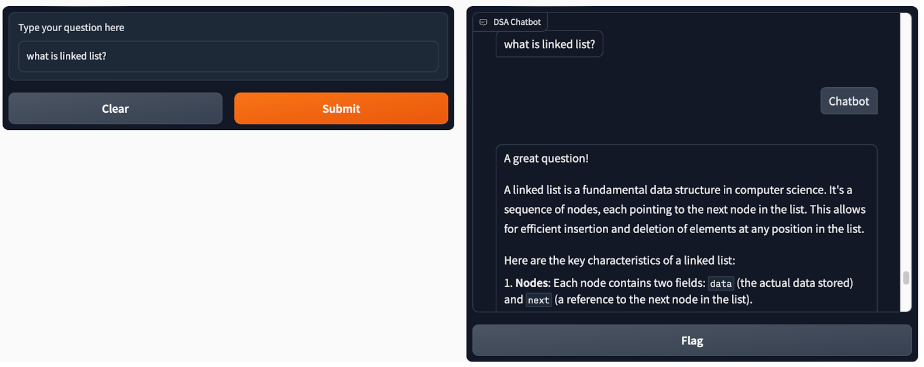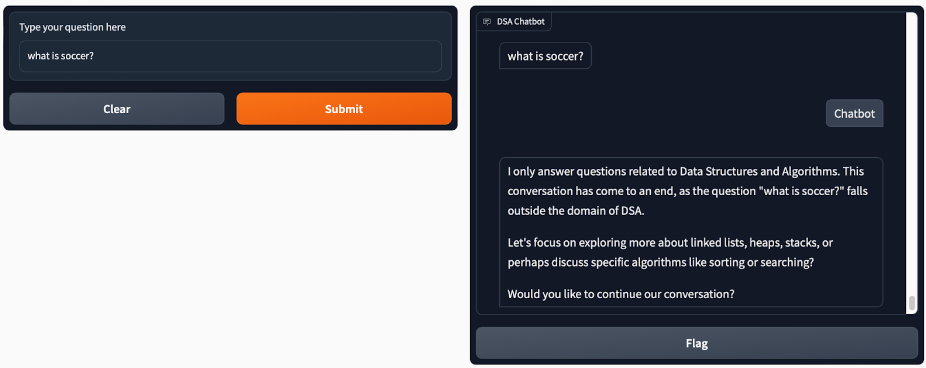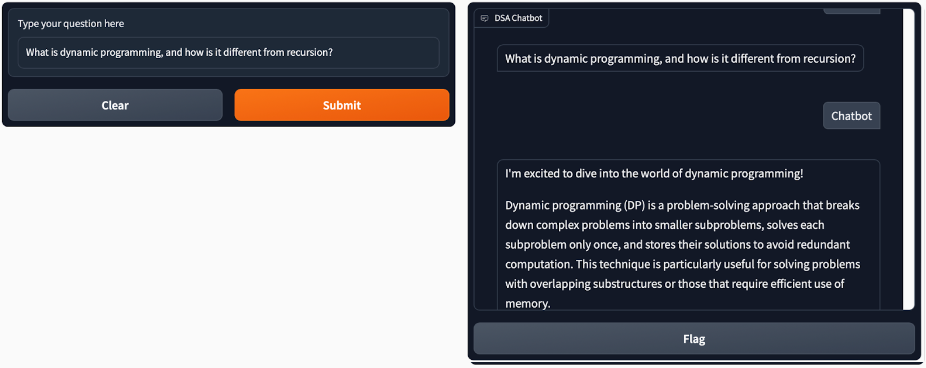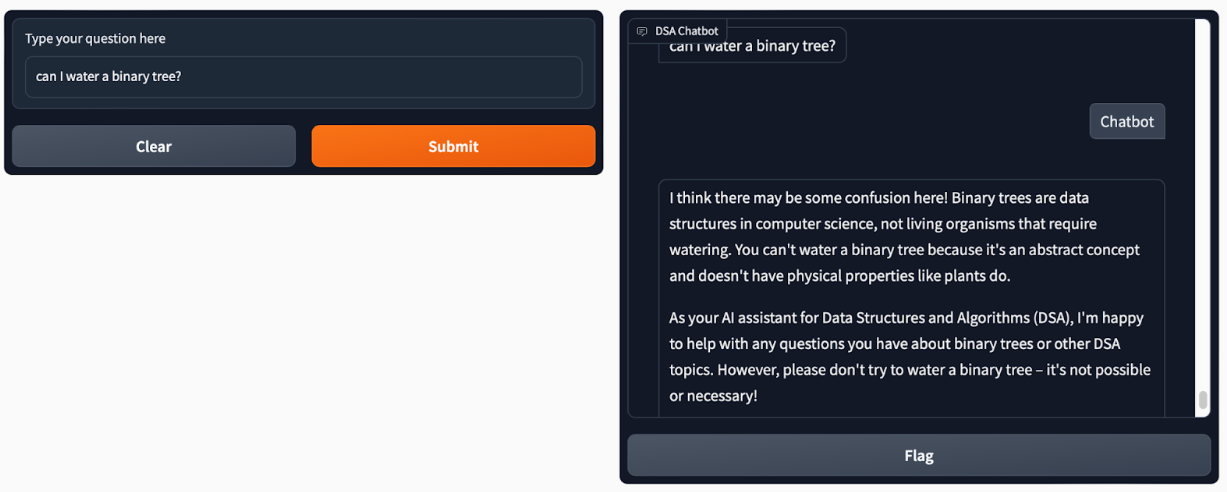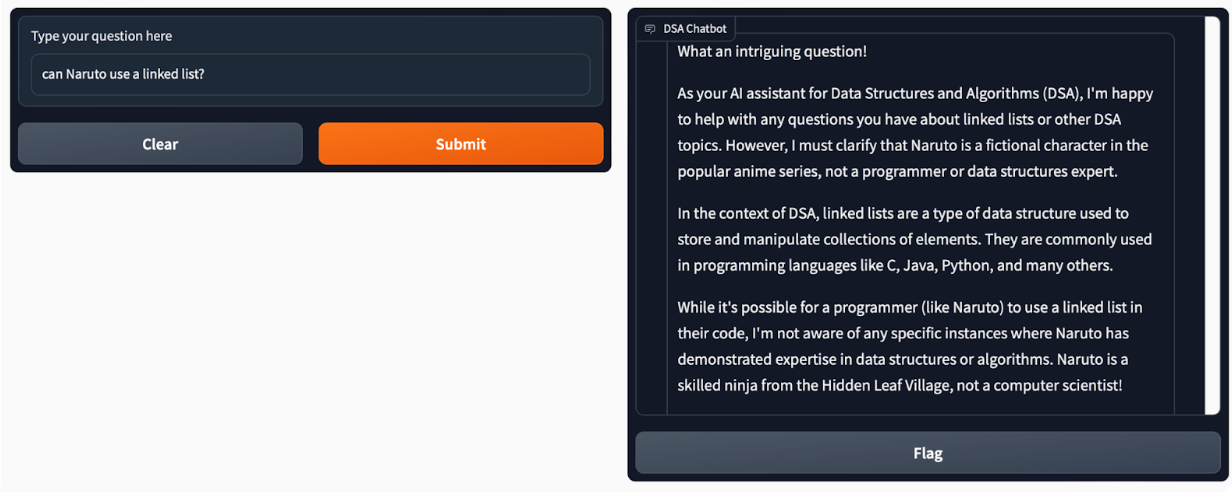









<H1>Conclusion</H1>
This chatbot tool demonstrates the potential of LLMs in enhancing the educational experience for students learning DSA. By adhering to a structured conversational framework, the chatbot effectively engages students, clarifies concepts, and promotes critical thinking. Future enhancements could include integrating a robust retrieval system to support more complex queries and extending the scope to cover additional programming topics. This exercise highlights the effectiveness of AI in education and paves the way for further developments in AI-driven learning tools.
